In [2]:
import pandas as pd
import os

In [110]:
df_day.drop(columns = ['date'],axis = 1)

,table_cck,table_cat,table_nlok,table_mcd,table_val,table_br,table_etsy,table_ctb,table_pnr,table_twtr,...,table_ilmn,table_azo,table_hpe,table_axp,table_cag,table_payx,table_s,table_ter,table_d,table_ftr
09:30:00,57.72,135.441,13.7316,186.580,16.25,110.509,63.7500,31.2428,36.787,37.49,...,314.65,1038.77,15.5370,109.097,NaN,77.2176,5.910,44.1766,69.3350,2.5300
09:30:00,57.72,135.441,13.7316,186.580,16.25,110.509,63.7500,31.2428,36.787,37.49,...,314.65,1038.77,15.5370,109.097,NaN,77.2176,5.910,44.1766,69.3350,2.5300
09:30:00,57.72,135.441,13.7316,186.580,16.25,110.509,63.7500,31.2428,36.787,37.49,...,314.65,1038.77,15.5370,109.097,NaN,77.2176,5.910,44.1766,69.3350,2.5300
09:30:00,57.72,135.441,13.7316,186.580,16.25,110.509,63.7500,31.2428,36.787,37.49,...,314.65,1038.77,15.5370,109.097,NaN,77.2176,5.910,44.1766,69.3350,2.5300
09:31:00,57.78,135.451,13.7428,186.600,16.30,110.596,63.8793,31.2769,36.787,37.69,...,314.01,1036.13,15.5370,109.049,29.4296,77.1673,5.905,44.0579,69.3100,2.5206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16:26:00,NaN,135.824,NaN,NaN,NaN,NaN,65.5000,NaN,NaN,39.94,...,NaN,NaN,NaN,NaN,NaN,NaN,5.720,NaN,NaN,2.4900
16:27:00,NaN,135.728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.91,...,NaN,NaN,NaN,NaN,NaN,NaN,5.720,NaN,NaN,2.4700
16:28:00,NaN,135.824,NaN,187.434,NaN,NaN,NaN,NaN,NaN,39.91,...,NaN,NaN,NaN,NaN,NaN,NaN,5.740,NaN,NaN,NaN
16:29:00,NaN,135.719,NaN,187.204,NaN,NaN,65.5000,NaN,NaN,39.91,...,322.06,1047.76,15.4622,110.809,NaN,79.0815,5.720,44.1271,69.9029,NaN


In [130]:
os.chdir("/Users/gideon/Downloads/allstocks_201904")

res = pd.DataFrame()
for folder in os.listdir():
    if folder == ".DS_Store":
        continue
    print(folder)
    date = folder.split("_")[1]
    
    #df for this date
    df_day = pd.DataFrame()
    df_day.index = pd.date_range("09:30", "16:30", freq="1min").time
    os.chdir("/Users/gideon/Downloads/allstocks_201904/"+folder)
    df_day['date'] = date
    print(date)
    print(len(os.listdir()))
    for file in os.listdir():
        df = pd.read_csv(file,header = None)
        ticker = file.split('.')[0].split("_")[1]
        
        df = df[[1,5]]
        df = df.drop_duplicates()
        df.reset_index(level=0,inplace = True)
        df[1] = df[1].astype(str).str.zfill(4)
        df[1] = pd.to_datetime(df[1],format = "%H%M").dt.time
        df.index = df[1]
        df = df[[5]]
        df.columns = [ticker]
        
        df_day = pd.merge(df_day,df,left_index = True,right_index= True,how = 'left')
    df_day.index = pd.to_datetime(df_day['date']+" "+df_day.index.astype(str),format = "%Y%m%d %H:%M:%S")
    #df.drop(columns = ['date'], axis = 1)
    res = df_day.append(res)
    
        

allstocks_20190423
20190423
650


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


allstocks_20190424
20190424
649


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


allstocks_20190412
20190412
650


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


allstocks_20190415
20190415
650


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


allstocks_20190425
20190425
649


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


allstocks_20190422
20190422
650


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


allstocks_20190409
20190409
650


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


allstocks_20190408
20190408
650


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


allstocks_20190430
20190430
649


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


allstocks_20190401
20190401
649


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


allstocks_20190418
20190418
650


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


allstocks_20190429
20190429
650


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


allstocks_20190416
20190416
650


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


allstocks_20190411
20190411
650


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


allstocks_20190410
20190410
650


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


allstocks_20190417
20190417
650


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


allstocks_20190426
20190426
649


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


allstocks_20190404
20190404
650


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


allstocks_20190403
20190403
650


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


allstocks_20190402
20190402
650


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


allstocks_20190405
20190405
649


/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/601623231.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df_day.append(res)


In [131]:

res

,date,cck,cat,nlok,mcd,val,br,etsy,ctb,pnr,...,incy,aal,cl,mtw,maa,vz,dds,aaba,pvt,pd
2019-04-05 09:30:00,20190405,55.5700,133.561,13.0038,182.697,16.26,103.973,68.54,30.9601,43.6759,...,83.8550,33.7574,64.8341,17.44,102.434,54.2369,73.4966,20.0748,NaN,NaN
2019-04-05 09:31:00,20190405,55.7100,133.400,13.0264,182.908,16.28,104.099,68.49,30.8626,43.6662,...,84.1800,33.8956,64.8197,17.48,NaN,54.1446,73.6920,20.0911,NaN,NaN
2019-04-05 09:32:00,20190405,55.6300,133.726,13.0659,182.678,16.32,104.240,68.59,NaN,43.7824,...,83.9700,33.8956,64.7526,17.54,101.956,54.1597,73.7115,20.0748,NaN,NaN
2019-04-05 09:33:00,20190405,NaN,133.554,13.0715,182.448,16.16,104.201,68.51,NaN,43.7533,...,84.4300,33.8614,64.9252,NaN,102.138,54.2921,73.6031,20.0394,NaN,NaN
2019-04-05 09:34:00,20190405,55.7628,133.058,13.0913,182.533,16.08,104.264,68.50,30.9991,43.7291,...,84.0002,33.7678,64.8389,17.44,102.171,54.2369,73.7604,20.0993,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-23 16:26:00,20190423,NaN,135.824,NaN,NaN,NaN,NaN,65.50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.1
2019-04-23 16:27:00,20190423,NaN,135.728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,53.0593,NaN,NaN,NaN,40.0
2019-04-23 16:28:00,20190423,NaN,135.824,NaN,187.434,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,53.0964,NaN,20.7097,NaN,NaN
2019-04-23 16:29:00,20190423,NaN,135.719,NaN,187.204,NaN,NaN,65.50,NaN,NaN,...,NaN,33.5206,66.5963,NaN,NaN,53.0593,NaN,NaN,NaN,NaN


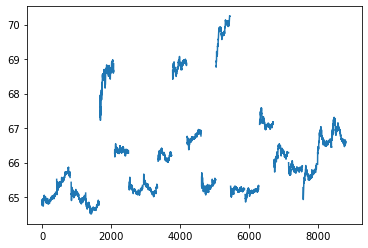

In [133]:
import matplotlib.pyplot as plt
plt.plot(res['cl'].values)

In [148]:
nulls = res.isna().sum(axis = 0)
good_columns = list(nulls[nulls < 500].index)

In [150]:
data = res[good_columns]
data.drop(columns = "date",axis = 1,inplace = True)

/var/folders/qw/ly0bcf551mgdzlvs3rs3vqb80000gn/T/ipykernel_16552/2353871600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = "date",axis = 1,inplace = True)


In [156]:
data = data.bfill().ffill()

In [159]:
data.isna().sum().sort_values()

cat     0
ge      0
cost    0
wmt     0
lmt     0
       ..
ko      0
odp     0
aapl    0
mgm     0
vz      0
Length: 158, dtype: int64

In [162]:
os.chdir("/Users/gideon/Desktop/General-Backtest")
data.to_csv("test_data.csv",index = True)

In [163]:
data

,cat,mcd,etsy,twtr,kmi,gme,celg,wdc,ups,nflx,...,ms,abt,jpm,lb,rad,bbby,nvda,biib,aal,vz
2019-04-05 09:30:00,133.561,182.697,68.54,34.6301,17.8967,9.9000,94.2100,49.8244,107.836,369.111,...,42.9067,76.4354,99.8698,26.1864,11.1960,17.0190,189.751,236.020,33.7574,54.2369
2019-04-05 09:31:00,133.400,182.908,68.49,34.5500,17.9057,9.8900,94.2500,49.8920,107.873,367.880,...,42.8782,76.4257,99.9170,26.2429,11.1680,16.8594,189.492,235.786,33.8956,54.1446
2019-04-05 09:32:00,133.726,182.678,68.59,34.5170,17.9282,9.9000,94.3162,49.9269,108.143,367.810,...,43.0824,76.2125,100.1200,26.2476,11.0600,16.8125,189.553,236.353,33.8956,54.1597
2019-04-05 09:33:00,133.554,182.448,68.51,34.5000,17.8966,9.9900,94.3700,50.1188,107.940,367.539,...,42.9162,76.0866,99.7659,26.2523,11.0200,16.8219,189.144,236.300,33.8614,54.2921
2019-04-05 09:34:00,133.058,182.533,68.50,34.6700,17.8743,9.9501,94.3600,50.1332,107.874,368.050,...,42.9162,75.9897,99.8131,26.2900,11.0180,16.6811,189.518,236.010,33.7678,54.2369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-23 16:26:00,135.824,187.434,65.50,39.9400,18.0405,8.8900,93.6700,52.2541,107.148,382.320,...,44.9874,74.0433,107.2500,23.8588,9.9099,15.5828,190.259,230.450,33.5206,53.0593
2019-04-23 16:27:00,135.728,187.434,65.50,39.9100,18.0405,8.8900,93.6700,52.2541,107.148,382.000,...,44.9874,74.0433,107.2500,23.8588,9.7200,15.5828,190.060,230.250,33.5206,53.0593
2019-04-23 16:28:00,135.824,187.434,65.50,39.9100,18.0495,8.8900,93.6700,52.2541,107.148,381.660,...,44.9874,74.0433,107.2590,23.8588,9.7200,15.5828,190.060,230.250,33.5206,53.0964
2019-04-23 16:29:00,135.719,187.204,65.50,39.9100,18.0495,8.8900,93.6700,52.2541,107.148,381.660,...,44.9874,74.0433,107.2500,23.8588,9.7101,15.5828,189.811,230.400,33.5206,53.0593
